
# MT1003 Computing Project 2023-24: 

Welcome to the MT1003 computing project.
    
## Instructions

The project itself is worth 15% of your final grade in the module.  There are 20 marks available, 10 for an applied question and 10 for a pure question.

#### Submitting your project
You should upload your work as a single *.ipynb* file to MMS as a single file by **5pm on Friday 29th March 2023** (end of Week 10).  

If you have been working on the server you will need to download the file from this server using `Download` in the `File` menu. The file **must** be downloaded as a Notebook. Your project must be self-contained and give the desired results when run in sequence (from top to bottom) by the marker. 

Before submitting, you should **restart the kernel and run all cells** (in the menubar, Run$\rightarrow$Restart Kernel and Run All Cells **or** click the double triangle symbol &#x23E9;) and check all outputs are as expected.

#### Getting help
Help is available from staff in your computing lab sessions in weeks 8-10 of the semester.  Make sure to use these well and do not leave all your questions to Week 10.  See computing booklet for more instructions and help.

#### Other comments
The questions in this project will be partly automatically graded. This means attention to detail is required to pass the grading tests. In particular where you are asked to create a specific variable or function, **it must be named exactly as written in the question**. Take note that Python is case-sensitive.
    
The cells which contain 
```Python
# Your answer here
``` 
are where you should enter your solution. Cells which contain 
    
```Python
# DO NOT EDIT THIS CELL
``` 
*should be left alone, not edited or deleted*.
    
We suggest copying the notebook and working in a draft version. Once you are happy with your solution you can copy into the final notebook. Be sure to check that the final notebook runs correctly after copying.

---

## Applied: A 2D Map

A modified [Henon map](https://en.wikipedia.org/wiki/H%C3%A9non_map) can be defined as

\begin{align}
x_{n+1} &= a-x_n^2+by_n \\
y_{n+1} &= \sin(x_n)
\end{align}

We can write such a two-dimensional map in vector form by saying $\mathbf{z}=\left( \begin{array}{c} x \\y\end{array} \right )$ with

$$
\mathbf{z}_{n+1} = \mathbf{f}(\mathbf{z}_n)
$$

and

$$
\mathbf{f}(\mathbf{z}_n)= \left( \begin{array}{c} a-x_n^2+by_n \\ \sin(x_n)\end{array} \right )
$$

We can then apply our usual iterative methods in Python to advance the map. 

___

### Q1.1

***By using numpy arrays (for $\mathbf{z}$) create a Python function for the iteration function $\mathbf{f}$ named `fIter(z)`*** which takes as input the array of $\left( \begin{array}{c} x_n \\y_n\end{array} \right )$ values and returns the corresponding $\left( \begin{array}{c} x_{n+1} \\y_{n+1}\end{array} \right ).$ In other words both input and output of your function should be 2 element numpy arrays.

***Use your function to perform 100 iterations of this map,*** setting $a=1.5$ and $b=0.25,$ starting from $(x_0,y_0)=(0,1)$ storing your values in a two-dimensional array, size $2\times 100,$ called `zs`.

***Create a scatterplot of the 100 $x$ and $y$ values*** (you might want to look at "Formatting the style of your plot" [here](https://matplotlib.org/stable/tutorials/pyplot.html#formatting-the-style-of-your-plot)).

**[3 marks]**

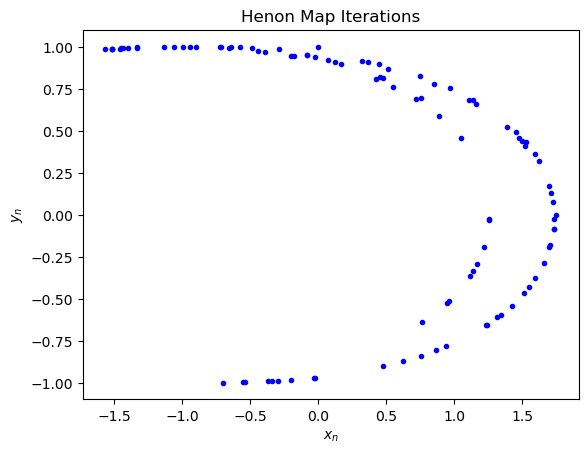

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fIter(z, a=1.5, b=0.25):
    x, y = z
    x_next = a - x**2 + b*y
    y_next = np.sin(x)
    return np.array([x_next, y_next])

# Perform 100 iterations
z = np.array([0, 1])  # Initial condition
iterations = 100
zs = np.zeros((2, iterations))  # Store x and y values

for i in range(iterations):
    zs[:, i] = z
    z = fIter(z)

# Scatterplot of the x and y values
plt.scatter(zs[0, :], zs[1, :], c='blue', marker='.')
plt.title('Henon Map Iterations')
plt.xlabel('$x_n$')
plt.ylabel('$y_n$')
plt.show()


In [2]:
# Don't edit this cell

if not "fIter" in globals():
    raise NotImplementedError("fIter has not been defined in Question 1.1")
if not "zs" in globals():
    raise NotImplementedError("zs has not been defined in Question 1.1")


### Q1.2

***Iterate again,*** the only difference this time being your ***initial condition:*** $(x_0,y_0)=(10^{-4},1).$ 

***Plot $x_n$-vs-$n$ for both initial conditions on the same axes*** (i.e. on the same plot). 

Compare the final $(x_{100},y_{100})$ between the two sets of iterations (i.e. the two different initial conditions), and ***choose the correct ending to the sentence below by creating a string***, named `answer1` which has the single character `a`, `b` or `c` corresponding to the correct choice. 

The difference between the final $(x_{100},y_{100})$ is

`a`   relatively large because of floating point error

`b`   relatively large because the system is chaotic

`c`   relatively small because the starting difference is small

**[1 marks]**

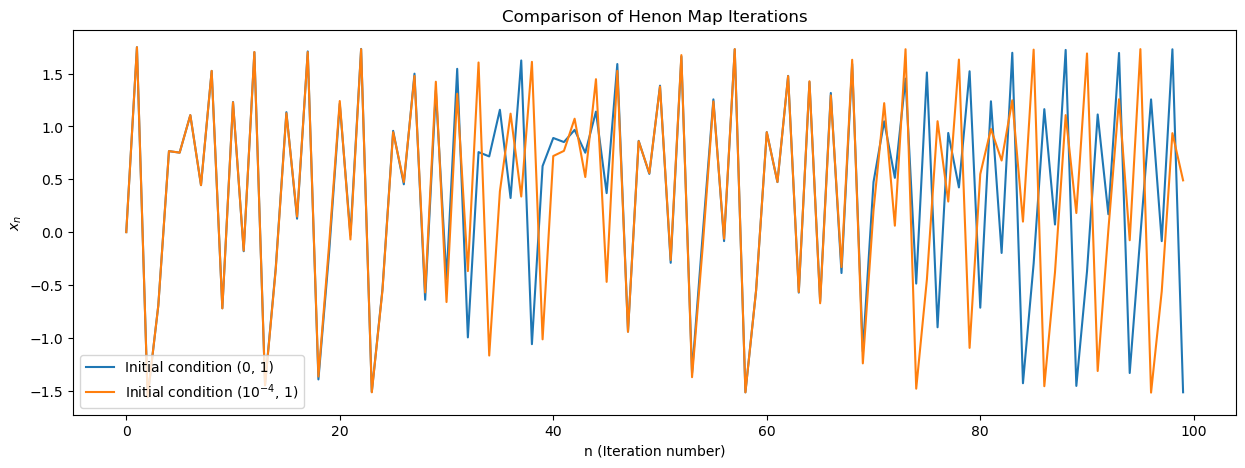

In [3]:
# New initial condition
z_new = np.array([1e-4, 1])  # (10^-4, 1)
zs_new = np.zeros((2, iterations))  # Store x and y values for new iterations

# Perform iterations for the new initial condition
for i in range(iterations):
    zs_new[:, i] = z_new
    z_new = fIter(z_new)

    
#print(zs[0, 99], zs[1, 99])
#print(zs_new[0, 99], zs_new[1, 99])


#Plot x_n vs n for both initial conditions
plt.figure(figsize=(15, 5))

# plt.scatter(range(iterations), zs[0, :], label='Initial condition (0, 1)')
# plt.scatter(range(iterations), zs_new[0, :], label='Initial condition ($10^{-4}$, 1)')

#Decided to plot these as curves rather than as a scatter plot, for easier inference. Scatter plot can be seen above.

plt.plot(range(iterations), zs[0, :], label='Initial condition (0, 1)')
plt.plot(range(iterations), zs_new[0, :], label='Initial condition ($10^{-4}$, 1)')
plt.title('Comparison of Henon Map Iterations')
plt.xlabel('n (Iteration number)')
plt.ylabel('$x_n$')
plt.legend()
plt.show()

answer1 = 'b'  # relatively large because the system is chaotic

In [4]:
# Don't edit this cell

if not "answer1" in globals():
    raise NotImplementedError("answer1 has not been defined in Question 1.2")


### Q1.3

As we know, maps like this one can have fixed points where $\mathbf{z}_{n+1}=\mathbf{z}_n.$ For this two-dimensional map the fixed point would satisfy the simultaneous equations

\begin{align}
x &= a-x^2+by \\
y &= \sin(x).
\end{align}

To obtain the solutions of these equations requires a numerical root-finding method. While it is possible to perform a ["2D Newton-Raphson" iteration](https://en.wikipedia.org/wiki/Newton%27s_method#Systems_of_equations), a better approach, in this example, is to simplify the problem by obtaining a function of one variable $g(x)$ and finding its root. 

---

***Obtain a valid $g(x)$ for which $g(x)=0$ provides the $x-$coordinate of the fixed point of the system above.***

***Define Python functions `g(x)` for this $g(x)$ and also one for $g'(x)$ called `dg(x)`.*** 

***Use these to perform Newton-Raphson iteration*** starting with an initial value of $-1$, iterating until $|g(x)|<10^{-7}.$ Store your final $(x,y)$ of your fixed point in a Python array named `zFix.` 

Verify that this is the fixed point by printing the difference $\mathbf{z}-\mathbf{f(z)}.$

**[2 marks]**

In [5]:
import numpy as np

# Constants
a = 1.5
b = 0.25

#Function g(x)
def g(x):
    return a - x**2 + b * np.sin(x) - x

# Derivative of g(x)
def dg(x):
    return b * np.cos(x) - 2*x - 1

#Newton-Raphson
x = -1  # initial guess
absval_limit = 1e-7

while abs(g(x)) > absval_limit:
    x = x - g(x) / dg(x)

#Fixed point y-coordinate
y = np.sin(x)

# Fixed point array
zFix = np.array([x, y])

#Verify the fixed point
# print("zFix:", zFix[0], ",", zFix[1])
print("Difference values:", zFix[0] - np.array([a - x**2 + b*y, np.sin(x)])[0], ",", zFix[1] - np.array([a - x**2 + b*y, np.sin(x)])[1])

#Since the difference values for both x,y are effectively 0, the iteration is accurate.

Difference values: 4.596323321948148e-14 , 0.0


In [6]:
# Don't edit this cell

if not "g" in globals():
    raise NotImplementedError("g has not been defined in Question 1.3")
    
if not "dg" in globals():
    raise NotImplementedError("dg has not been defined in Question 1.3")
    
if not "zFix" in globals():
    raise NotImplementedError("zFix has not been defined in Question 1.3")


### Q1.4

The points plotted in Q1.1 and Q1.2 lie on the "attractor" for this system; if you keep iterating we will fill out some (complicated) curve/shape for this object on the $(x,y)$ plane. Points on the plane can either be attracted towards this attractor or repelled away from it (to infinity in some direction). The set of starting points which result in iterations moving on to the attractor (i.e. that do not tend to infinity), are known as its "basin of attraction".

---

Visualise the basin of attraction in the following way. 

* ***Set up a 2D grid of $(x_0,y_0)$ points***; Use `linspace` commands to make an array, named `xgrid` for $x_0\in[-5,5]$ and another `ygrid` for $y_0\in[-5,5],$ each with 50 points. 
* This grid provides a $50\times 50$ set of points to start our iterations from; ***by using nested loops to traverse all $(x_{0},y_{0})$ combinations, perform 25 iterations of our map, starting from each point. Store the final $|x_{25}|$ in a $50\times 50$ array called `xEnd`.***
* Some starting values will end up with iterations tending to infinity; to prevent this, ***stop the iteration if $|x|>10^7.$*** In this case `xEnd` should contain the final iteration before stopping.
* ***Plot the result*** by using the following code:

```
xx,yy = np.meshgrid(xgrid,ygrid,indexing='ij')

plt.figure()
plt.pcolor(xx,yy,xEnd)
plt.clim(-10,10)
plt.xlabel('x')
plt.xlabel('y')
plt.show()

```

You should see bright yellow where the iteration has diverged and some blue/green colour where the iteration goes to the attractor.

* Plot, in the same figure (i.e. overlaid on top), the points generated in Q1.1 and the fixed point from Q1.3.

**[2 marks]**

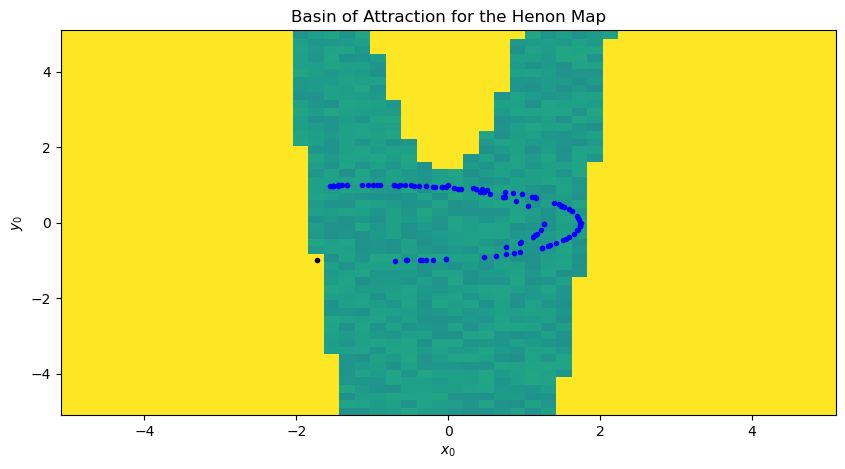

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and setup
a, b = 1.5, 0.25
iterations = 25
grid_size = 50

# Grid 
xgrid = np.linspace(-5, 5, grid_size)
ygrid = np.linspace(-5, 5, grid_size)
xEnd = np.zeros((grid_size, grid_size))

# iterating over the grid
for i, x0 in enumerate(xgrid):
    for j, y0 in enumerate(ygrid):
        x, y = x0, y0
        for k in range(iterations):
            x, y = a - x**2 + b*y, np.sin(x)
            if abs(x) > 1e7:  # Check for divergence
                break
        xEnd[i, j] = abs(x)

# Plotting
plt.figure(figsize=(10, 5))
plt.title('Basin of Attraction for the Henon Map')

xx, yy = np.meshgrid(xgrid, ygrid, indexing='ij')
plt.pcolor(xx, yy, xEnd, shading='auto')
plt.clim(-10,10)
plt.xlabel('$x_0$')
plt.ylabel('$y_0$')

#Overlaying points from q1.1
plt.scatter(zs[0, :], zs[1, :], c='blue', marker='.')

#Overlaying fixed point from q1.3
plt.plot(zFix[0], zFix[1], c='black', marker='.')
plt.show()


### Q1.5

It turns out that the fixed point lives on the edge of the basin of attraction! We can use this fact to obtain the fixed point in a novel way. 

We can use a bisection method to find it, but not by finding a root by a change of sign, but by finding the "edge" by a change in behaviour. In other words we start with two points, $\mathbf{z}_1$ which is inside the basin and $\mathbf{z}_2$ outside. We then obtain the midpoint, iterate the map, and then choose to update either the inside point or the outside point depending on if we moved onto the attractor or we moved towards infinity. Note, computationally this is an easy check; if the iteration ends up with $|x|$ being very large we update the outside point, otherwise we update the inside. This is the same criterion we used in Q1.4 to stop early.

If we do this, we will end up with the (starting) point at the intersection of the edge with the line connecting the starting $\mathbf{z}_1$ and $\mathbf{z}_2.$ More importantly iterating from that point will traverse the edge for some time before moving away. Because the fixed point is a ["saddle" ](https://en.wikipedia.org/wiki/Saddle_point) (don't worry too much about what this means), the iterations will always move along the edge towards the fixed point, before heading off in either direction.

This method of traversing "the edge of chaos" has proved really useful in understanding how fluid flow in pipes and channels [transitions to turbulence](https://chaosbook.org/library/SchneiderPRL07.pdf).

---

Using your plot from Q1.4 ***choose the $\mathbf{z}_1$ and $\mathbf{z}_2$ on either side of the edge***. Best to choose the exterior point to the left of the fixed point.  

***Perform 50 steps of bisection*** updating the points as described above based on the outcome of iterating the map with the midpoint.

***Stop bisecting if, at some point during the iteration of the map, we reach the fixed point,*** in other words $|\mathbf{z}_{n+1}-\mathbf{z}_n|<tol$ (or equivalent). We need to be a bit careful that we break out of both the loop iterating the map *and* the loop iterating the bisection method. Note that the fixed point will be found at a later iteration $\mathbf{z}_n$, *not* the inside or outside *starting* points $\mathbf{z}_1$ or $\mathbf{z}_2$.

***Save your fixed point value in the Python variable `zFixNew`,*** and print it, along with the number of bisection iterations required to converge to it.


***Here is some pseudocode to help;***

   

    Set number of bisection steps (50)
    Set number of iterations of the map (100)
    Set the tolerance for convergence (1.e-7)

    Set interior point z1
    Set exterior point z2
    Set-up array for midpoint

    Do bisection loop

        Obtain midpoint
    
        Use midpoint as starting value for iterating the map
    
        Do map iteration loop
            
            Update map
            
            Check if iterations are diverging (moving towards ± inf)
                if True update exterior point z2 and stop iterating map
             
            Check if fixed point condition is satisfied
                if True we can stop completely (both loops) and save the current z
                
        After the map iteration is complete, check if the midpoint was inside the basin
            update the interior point z1


**[2 marks]**

In [8]:
import numpy as np

# Constants and functions from previous questions
a, b = 1.5, 0.25

def henon_map(z):
    x, y = z
    return np.array([a - x**2 + b*y, np.sin(x)])

# Initial setup
z1 = np.array([0, 1])  # Inside the basin
z2 = np.array([-3, 1])  # Outside the basin
tol = 1e-7
max_bisection_steps = 50
max_iterations = 100

# Bisection loop
for i in range(max_bisection_steps):
    z_mid = (z1 + z2) / 2
    z = z_mid
    for j in range(max_iterations):
        z_next = henon_map(z)
        if np.abs(z_next[0]) > 1e7:  # Check divergence
            z2 = z_mid
            break  
         #convergence check; to calculate whether the absolute value of (z_next - z) < tol, 
         #here we are checking if the square root of the difference in x and y values squared are less than tol.
        dx, dy = z_next - z  # Component-wise difference
        if np.sqrt(dx**2 + dy**2) < tol:  # distance calculation to check if acceptable convergence is achieved
            zFixNew = z
            print("Converged to fixed point:", zFixNew)
            print("Bisection steps:", i + 1)
            break
        z = z_next
    else:
        z1 = z_mid  # Update inside point if no divergence

    if 'zFixNew' in locals():  #Check if fixed point was found by looking for zFixNew in local variables
        break
if 'zFixNew' not in locals():  # If fixed point not found in given steps
    print("Fixed point not found in", max_bisection_steps, "bisection steps")

Converged to fixed point: [-1.72597055 -0.98798457]
Bisection steps: 31


In [9]:
# Don't edit this cell
    
if not "zFixNew" in globals():
    raise NotImplementedError("zFixNew has not been defined in Question 1.5")



---

## Pure: Chinese Remainder Theorem

Given a single *linear congruence equation* like $x \equiv a \pmod{n}$, it is easy to find a solution - just take $x = a$. But what if you are given a system of simultaneous equations, like the following?

$$
\begin{align*}
x &\equiv 2 \pmod{6} \\
x &\equiv 3 \pmod{7}
\end{align*}
$$

It is a bit more work, but through trial-and-error you could find a solution $x = 38$. Now imagine you are instead given

$$
\begin{align*}
x &\equiv 85 &&\pmod{103} \\
x &\equiv 143 &&\pmod{257} \\
x &\equiv 2 &&\pmod{673}
\end{align*}
$$

with smallest solution $9294805$. How would you even know that there is a solution to this? One useful tool is the Chinese Remainder Theorem:

----

**Chinese Remainder Theorem**

Suppose we have a system of linear congruence equations

\begin{align*}
x &\equiv a_1 &&\pmod{n_1} \\
x &\equiv a_2 &&\pmod{n_2} \\
& & \vdots \\
x &\equiv a_k &&\pmod{n_k}
\end{align*}

such that $0 \leq a_i < n_i$ and  $n_i > 1$ for all $i$, and $\gcd(n_i, n_j) = 1$ whenever $i \neq j$ (i.e. the *moduli* are all distinct and coprime). Let $N = n_1n_2\cdots n_k$ be the product of all of the moduli.
Then there is a unique solution $x$ to the system such that $x \in \{0, 1, 2, \ldots, N-1\}$.

----

So now we can tell that the system above has a solution (after verifying that the moduli are coprime), but how could you find one? We will implement three methods for doing so, the last of which allows large systems to be solved incredibly quickly.

### Q2.1

The first thing we need to be able to do is to check if a solution is actually correct.

***Write a function `isSolution` which takes two arguments `x` and `system`, and checks if `x` is a solution to `system`. It should return `True` if so, and `False` otherwise.***

The `system` should be represented as a list of tuples `[(a1, n1), (a2, n2), ..., (ak, nk)]`; for example, the system above would be represented by `[(85, 103), (143, 257), (2, 673)]`.

Be sure to return the boolean values `True` or `False`, not the strings `"True"` or `"False"` - and you must `return` rather than `print`.

Within your function, you can assume that `x` is an integer in the correct range (i.e. the set shown above), and that `system` is represented as above.

There is a helpful piece of syntax called "tuple unpacking" that you might want to use throughout the rest of the project, demonstrated in the following piece of code; you should run this before using it and work out what is going on.

```python
system = [(85, 103), (143, 257), (2, 673)]
for rem, mod in system:
    print("remainder: ", rem, ", modulus: ", mod)
```

**[1 mark]**

In [10]:
def isSolution(x, system):
    for rem, mod in system:
        if x % mod != rem:
            return False
    return True

#Examples
system = [(85, 103), (143, 257), (2, 673)]

x_given = 9294805  #given solution
print(isSolution(x_given, system))

x_trial = 1234123 #trial value
print(isSolution(x_trial, system))


True
False


In [11]:
if not "isSolution" in globals():
    raise NotImplementedError("isSolution has not been defined in Question 2.1")


### Q2.2

A friend, hearing about your new interest in systems of linear congruence equations, challenges you to solve the  system

`system1 = [(328, 419), (93, 421), (391, 431), (234, 433), (274, 439)]`

They promise that the answer is a familiar number.



Now that you have `isSolution`, you can implement the first of the methods: just test all of the numbers between $1$ and $N$ (where $N$ is the product of the moduli, as above). When you find a solution, `return` it.

***Implement this as a function `bruteForceSolver`, which takes one argument `system` (represented as above), and returns the solution to `system` lying in the range $\{0, 1, \ldots, N-1\}$.***


***Use this function to find the solution to `system1`, and store it in a variable `solution1`***.


You can assume when writing your function that all of the moduli are coprime, and so a solution does exist.

**[2 marks]**

In [12]:
def bruteForceSolver(system):
    # Calculate the product of the moduli
    prod_mods = 1
    for rem, mod in system:
        prod_mods *= mod

    #Check each number from 1 to N to find solution
    for x in range(1, prod_mods):
        if isSolution(x, system):
            return x

#Example with given system
system1 = [(328, 419), (93, 421), (391, 431), (234, 433), (274, 439)]
solution1 = bruteForceSolver(system1)
print(solution1)


314159


In [13]:
if not "bruteForceSolver" in globals():
    raise NotImplementedError("bruteForceSolver has not been defined in Question 2.2")
if not "solution1" in globals():
    raise NotImplementedError("solution1 has not been defined in Question 2.2")

### Q2.3

Not satisfied with your solution, your friend gives you another system that they claim is impossible to solve by brute force, but still has a recognisable answer:

```python
system2 = [(317767, 611839),
           (478266, 611873),
           (92103, 611879),
           (197226, 611887),
           (435360, 611903)]
```

You will need to implement a better method than in Q2.2.

We have a system of equations

\begin{align*}
x &\equiv a_1 &&\pmod{n_1} \\
x &\equiv a_2 &&\pmod{n_2} \\
& & \vdots \\
x &\equiv a_k &&\pmod{n_k}
\end{align*}

One solution to the first equation is simply $x_1 = a_1$. Other solutions to the first equation are of the form $x_1 + ln_1$ for some $l$, so to find a solution to the first two equations you can try $l = 1, 2, 3, \ldots$ until you find a value $x_2 = x_1 + ln_1$ with $x_2 \equiv a_2 \pmod{n_2}$.

Other solutions to the first two equations are then of the form $x_2 + jn_1n_2$, so you can search these for a solution to the first three equations, and so on. Eventually you will find a solution $x_k$ to the whole system of equations.


***Implement this as a function `progressiveSolver`, which takes one argument `system` (represented as above), and returns the solution to `system` lying in the range $\{0, 1, \ldots, N-1\}$.***


***Use this function to find the solution to `system2`, and store it in a variable `solution2`***.

The same assumptions as above apply.

**[2 marks]**

In [14]:
def progressiveSolver(system):
    
    x = system[0][0]  #starting solution is the remainder of the first equation
    prod_mods = system[0][1] #starting product of mods is the first modulo in the system.

    for rem, mod in system[1:]:  #Start from the second tuple
        # Adjust x till it satisfies the current congruence
        while x % mod != rem:
            x += prod_mods

        prod_mods *= mod  #set product of moduli for the next level of congruences

    return x

# Example usage
system2 = [(317767, 611839), (478266, 611873), (92103, 611879), (197226, 611887), (435360, 611903)]
solution2 = progressiveSolver(system2)
print(solution2)


27182818284590


In [15]:
if not "progressiveSolver" in globals():
    raise NotImplementedError("progressiveSolver has not been defined in Question 2.3")
if not "solution2" in globals():
    raise NotImplementedError("solution2 has not been defined in Question 2.3")

### Q2.4

Frustrated by you solving their systems, your "friend" gives you one final ridiculous system:

\begin{align*}
x &\equiv 72 &&\pmod{103} \\
x &\equiv 674792 &&\pmod{1000003} \\
x &\equiv 24309993710 && \pmod{100000000003} \\
x &\equiv 9100910088300730 && \pmod{1000000000000000003}\\
x &\equiv 2170217021702179244924493 && \pmod{10000000000000000000000003}
\end{align*}



```python
system3 = [(72, 103),
           (674792, 1000003),
           (24309993710, 100000000003),
           (9100910088300730, 1000000000000000003),
           (2170217021702179244924493, 10000000000000000000000003)]
```

The solution is a very recognisable number, but extremely large. To solve this system, we will have to improve our method again. We first need a better method for solving systems of two equations

\begin{align*}
x &\equiv a_1 &&\pmod{n_1} \\
x &\equiv a_2 &&\pmod{n_2}
\end{align*}

Since $\gcd(n_1, n_2) = 1$ by assumption, Bezout's Lemma (Corollary 3.11 in the Pure lecture notes) tells us we can write $1 = cn_1 + dn_2$ for some integers $c, d$. You can then check that $x = a_1dn_2 + a_2cn_1$ (note the order!) is a solution to these two equations. This gives rise to an iterative method for solving a larger system:

1. Find a solution $x_2$ to the first two equations, let $m_2 = n_1n_2$, and reduce $x_2$ modulo $m_2$.
2. Form a new equation $x \equiv x_2 \pmod{m_2}$.
3. Find a solution $x_3$ to this new equation together with the original third equation, let $m_3 = n_1n_2n_3$, and reduce $x_3$ modulo $m_3$.
4. Form a new equation $x \equiv x_3 \pmod{m_3}$.
5. Find a solution $x_4$ to this new equation together with the original fourth equation, let $m_4 = n_1n_2n_3n_4$, and reduce $x_4$ modulo $m_4$.
6. Carry on like this until you find the solution $x_k$.

In this process, you are only ever solving a system of two equations at a time, so you can use the Bezout coefficients as described above.


***(a) Copy the code provided below into a code cell below and modify it so that it correctly returns the coefficients for Bezout's Lemma obtained via the extended Euclidean algorithm.***

```python
def bezoutCoefficients(a, b):
    # For this code, we won't force a to be bigger to start with.
    # coeffsLeft represents the coefficients seen on the left hand side
    # while doing the extended Euclidean algorithm (and similarly for coeffs_right)
    coeffsLeft = [1, 0]
    coeffsRight = [0, 1]
    left = a
    right = b

    while min(left, right) > 0:
        if left < right:
            q = right // left     # // does "integer division"
            r = right % left
            coeffsRight = [coeffsRight[0] - q*coeffsLeft[0], coeffsRight[1] - q*coeffsLeft[1]]
            right = r
        else:
    # Complete this function!
```
Note: you only need to make additions to this code; it is not necessary to change anything that is already there.

**[2 marks]**


***(b) Implement the method above for solving a system of 2 congruence equations as a function `solve2System`. It should have one argument `system`, a system of length 2, and it should return the solution $x = a_1dn_2 + a_2cn_1$ from above. Once you have this function, use the function `iterativeSolver` provided below to solve `system3`, and store the answer as `solution3`.***

```python
def iterativeSolver(system):
    currentSol = solve2System(system[:2])
    currentMod = system[0][1] * system[1][1]
    for eqn in system[2:]:
        currentSol = solve2System([(currentSol, currentMod), eqn])
        currentMod *= eqn[1]
    return currentSol
```

**[2 marks]**

In [16]:
def bezoutCoefficients(a, b):
    # For this code, we won't force a to be bigger to start with.
    # coeffsLeft represents the coefficients seen on the left hand side
    # while doing the extended Euclidean algorithm (and similarly for coeffs_right)
    coeffsLeft = [1, 0]
    coeffsRight = [0, 1]
    left = a
    right = b

    while min(left, right) > 0:
        if left < right:
            q = right // left     # // does "integer division"
            r = right % left
            coeffsRight = [coeffsRight[0] - q*coeffsLeft[0], coeffsRight[1] - q*coeffsLeft[1]]
            right = r
        else:
            q = left // right 
            r = left % right
            left = r
            coeffsLeft = [coeffsLeft[0] - q * coeffsRight[0], coeffsLeft[1] - q * coeffsRight[1]]

    # Return the final coefficients
    if left > 0:
        return coeffsLeft  #Return coefficients for a if left is non-zero
    else:
        return coeffsRight  #Return coefficients for b if right is not-zero

In [17]:
def solve2System(system):
    (a1, n1), (a2, n2) = system
    c, d = bezoutCoefficients(n1, n2)  # Get Bezout coefficients for the moduli

    x = a1 * d * n2 + a2 * c * n1  # Solution formula 
    x %= n1 * n2  # Reduce x modulo the product of n1 and n2 to get the minimum solution

    return x


def iterativeSolver(system):
    currentSol = solve2System(system[:2])
    currentMod = system[0][1] * system[1][1]
    for eqn in system[2:]:
        currentSol = solve2System([(currentSol, currentMod), eqn])
        currentMod *= eqn[1]
    return currentSol

#Given system
system3 = [(72, 103),
           (674792, 1000003),
           (24309993710, 100000000003),
           (9100910088300730, 1000000000000000003),
           (2170217021702179244924493, 10000000000000000000000003)]

solution3 = iterativeSolver(system3)
print(solution3)


100310031003100310031003100310031003100310031003100310031003


In [18]:
if not "bezoutCoefficients" in globals():
    raise NotImplementedError("bezoutCoefficients has not been defined in Question 2.4a")

In [19]:
if not "solve2System" in globals():
    raise NotImplementedError("solve2System has not been defined in Question 2.4b")
if not "solution3" in globals():
    raise NotImplementedError("solution3 has not been defined in Question 2.4b")


### Q2.5

In all of the questions above, we assumed that the moduli are coprime. If they are not, two things can happen: there might be no solution (the system is *inconsistent*), or there might be multiple solutions in the range $\{0, 1, \ldots, N-1\}$ (where $N$ is the product of the moduli as above).

***Find examples of systems showing each of these behaviours, and store them as `systemInconsistent` and `systemNonunique`.***

Within each system, there should be at least 3 moduli, each greater than $1$, and the moduli must all be distinct.

**[1 mark]**

In [20]:

systemInconsistent = [(1, 4),  #x ≡ 1 (mod 4)
                      (2, 6),  #x ≡ 2 (mod 6), contradicting the first
                      (3, 8)]  #x ≡ 3 (mod 8), further complication

systemNonunique = [(2, 4),  #x ≡ 2 (mod 4)
                   (2, 8),  #x ≡ 2 (mod 8), not contradicting but overlapping due to shared factors
                   (2, 12)] #x ≡ 2 (mod 12), furthering the non-uniqueness


In [21]:
if not "systemInconsistent" in globals():
    raise NotImplementedError("systemInconsistent has not been defined in Question 2.5")
if not "systemNonunique" in globals():
    raise NotImplementedError("systemNonunique has not been defined in Question 2.5")
    